

# Project: Investigate a Dataset of no-show medical appointments

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Research Questions</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

Today we are going to look at the medical dataset of no-show appointments in Brazil (https://www.kaggle.com/joniarroba/noshowappointments). The colums are
- PatientiD
- AppintmentID
- Gender
- ScheduledDay
- AppontmentDay
- Age
- Neighbourhood
- Scholarship
- Hipertension
- Diabetes
- Alcoholism
- Handcap
- SMS_Recieved
- No-show

On evaluation of the data, our research questions are 
- Research Question 1 - is there a different in age between men and woman?
- Research Question 2 do more men or women miss there appointments?
- Research question 3 - what neighbourhood misses the most appointments?
- Research question 4 - what variables might pridict the fate of noshows?
- Research question 5 - what proportion of total patients are noshows?
- Research Question 6 - is any day in particular quite busy

In [4]:
# The first step is to read the data into file so load all required packages
# also matlib inline lets us see visualisation within the Jupyter Notebook
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

df_app = pd.read_csv('noshowappointments-kagglev2-may-2016.csv') # this pandas fucntion adds in csv file - comma delimited 

In [8]:
def visual_inspect(df, size=5):
    print('>>> Shape =', df.shape)
    display(df.head(size))    
    print('>>> Types\n', df.dtypes)

    # Wrote a combinted function to recall shape, head (first five rows) and datatypes)

In [9]:
visual_inspect(df_app) # calls our above function

>>> Shape = (110527, 14)


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


>>> Types
 PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object


In [10]:
df_app.info()
# class info on our dateframe such count, non-numm values, entries

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [11]:
df_app.isnull().sum()
# calls number of null values per columns
# We can see there are none

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [12]:
df_app.isnull().any(axis = 1).sum()

# comfirming that we have no null values


0

In [13]:
df_app.head(10)
# Returning the first 10 rows

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
5,9.598513e+13,5626772,F,2016-04-27T08:36:51Z,2016-04-29T00:00:00Z,76,REPÚBLICA,0,1,0,0,0,0,No
6,7.336882e+14,5630279,F,2016-04-27T15:05:12Z,2016-04-29T00:00:00Z,23,GOIABEIRAS,0,0,0,0,0,0,Yes
7,3.449833e+12,5630575,F,2016-04-27T15:39:58Z,2016-04-29T00:00:00Z,39,GOIABEIRAS,0,0,0,0,0,0,Yes
8,5.639473e+13,5638447,F,2016-04-29T08:02:16Z,2016-04-29T00:00:00Z,21,ANDORINHAS,0,0,0,0,0,0,No
9,7.812456e+13,5629123,F,2016-04-27T12:48:25Z,2016-04-29T00:00:00Z,19,CONQUISTA,0,0,0,0,0,0,No


In [9]:
df_app.dtypes
# Going back to datatypes we can use a separate function here

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

In [10]:
type(df_app['Age'][0])
# We are calling this function to confrim that age is an int64 as the above function calls. 
# Thus function [10] can be used for confirmation as sometimes .dtypes may not give correct ones

numpy.int64

In [14]:
df_app.duplicated().sum()
# calling number of duplicated data

0

In [15]:
df_app.nunique()
# calling unique data

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

We can see that there 14 columns and 110527 rows of data. We can also see that there are no non-null values and no missing data.
However as we can see from the table both Appointment Day and Scheduled Day have both date and time present.
For further plotting we may want to separate these out in the data cleaning process. We can also confirm age as being an interger as an example


In [16]:
print(sorted(df_app['Neighbourhood'].unique()))
# Here we are calling all the unique vales of neighbourhood. This is done prior to data wrangling as a quick obversation to 
# see do we have any obvious errors

['AEROPORTO', 'ANDORINHAS', 'ANTÔNIO HONÓRIO', 'ARIOVALDO FAVALESSA', 'BARRO VERMELHO', 'BELA VISTA', 'BENTO FERREIRA', 'BOA VISTA', 'BONFIM', 'CARATOÍRA', 'CENTRO', 'COMDUSA', 'CONQUISTA', 'CONSOLAÇÃO', 'CRUZAMENTO', 'DA PENHA', 'DE LOURDES', 'DO CABRAL', 'DO MOSCOSO', 'DO QUADRO', 'ENSEADA DO SUÁ', 'ESTRELINHA', 'FONTE GRANDE', 'FORTE SÃO JOÃO', 'FRADINHOS', 'GOIABEIRAS', 'GRANDE VITÓRIA', 'GURIGICA', 'HORTO', 'ILHA DAS CAIEIRAS', 'ILHA DE SANTA MARIA', 'ILHA DO BOI', 'ILHA DO FRADE', 'ILHA DO PRÍNCIPE', 'ILHAS OCEÂNICAS DE TRINDADE', 'INHANGUETÁ', 'ITARARÉ', 'JABOUR', 'JARDIM CAMBURI', 'JARDIM DA PENHA', 'JESUS DE NAZARETH', 'JOANA D´ARC', 'JUCUTUQUARA', 'MARIA ORTIZ', 'MARUÍPE', 'MATA DA PRAIA', 'MONTE BELO', 'MORADA DE CAMBURI', 'MÁRIO CYPRESTE', 'NAZARETH', 'NOVA PALESTINA', 'PARQUE INDUSTRIAL', 'PARQUE MOSCOSO', 'PIEDADE', 'PONTAL DE CAMBURI', 'PRAIA DO CANTO', 'PRAIA DO SUÁ', 'REDENÇÃO', 'REPÚBLICA', 'RESISTÊNCIA', 'ROMÃO', 'SANTA CECÍLIA', 'SANTA CLARA', 'SANTA HELENA', 'SANTA

In [17]:
print(sorted(df_app['Age'].unique()))
# Again, we are calling all unique values, this time of age, to see do we have any errors

[-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 102, 115]


We are looking for typos in our data. All neighbourhood values look good. This shows us that we have 110527 appointments over 62299 differnt patients
across 81 different neighbourhoods. We can also see that columns like Scholarship,
Hypertension, Diabetes, Alcoholism, SMS_recieved and Handcap are intergers. However for visuals 
later we may need to transfer them into objects. For example we can transfer the response 0 1 in
the Diabees column to Yes No. However for this I didn't do this. 
In addition while there are 27 dates for Appointment Day the ScheduledDay column shows 103549
columns. Going back to the table we can see the time in the column for appointmentDay is the same. While the time for ScheduledDay is most probably from the timestamp from when the appointment was added into the system
One of the things we can go is separate out date and times (while we don't fully need it for AppointmentDay we do need it for 
ScheduledDay)


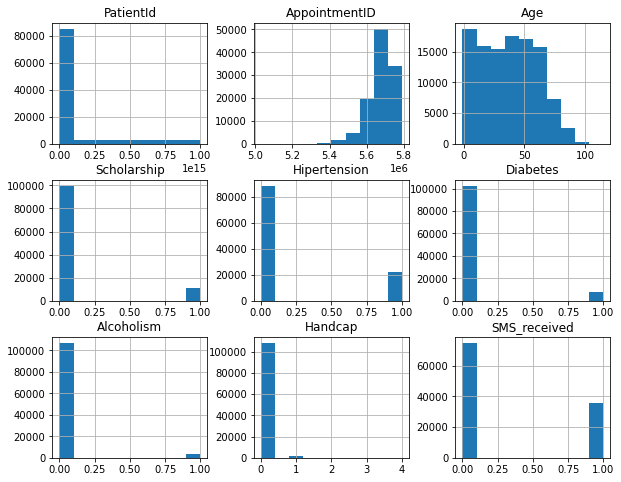

In [18]:
df_app.hist(figsize=(10,8));
# calling a histogram of our data. Lets look at age in a little more detail

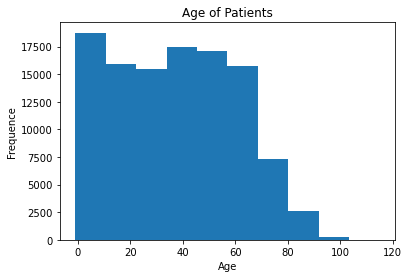

In [23]:
df_app['Age'].plot(kind='hist')
plt.title("Age of Patients")
plt.xlabel("Age")
plt.ylabel("Frequence");
# We can see that the data is skewed to age and does not show a normal distribution

In [24]:
df_app.describe()
# Calls summary statistics of columns

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


We can see that nearly half of the patients recieved a SMS message (1) this column may be interesting for a later research question. 
Low numbers of patients have dieases such as diabetes, alcolholism, with more having hypertension. Most patients do not have a Handcap
While the average age is around 37 we can see the oldest is 115. However the youngest is -1, this may be a typo or a mother who is pregnant


<a id='wrangling'></a>
## Data Wrangling

As stated in the introduction we want to change AppointmentDay and ScheduledDay to to columns
Also hipertension is wrong so we can rename that column and some others 

In [25]:
df_app.rename(columns = {'Hipertension': 'Hypertension','Handcap': 'Handicap', 'No-show': 'Noshow'}, inplace = True)
# We are renaming some columns that have spelling mistakes


In [26]:
print(df_app.columns)

# We can see or changes were made with the inplace=true command


Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hypertension',
       'Diabetes', 'Alcoholism', 'Handicap', 'SMS_received', 'Noshow'],
      dtype='object')


In [27]:
df_app['AppointmentDay_Date'] = pd.to_datetime(df_app['AppointmentDay']).dt.date
df_app['AppointmentDay_Time'] = pd.to_datetime(df_app['AppointmentDay']).dt.time
# Turing AppointmentDay column to a separate column for date and time

In [29]:
df_app['SchuduledDay_Date'] = pd.to_datetime(df_app['ScheduledDay']).dt.date
df_app['ScheduledDay_Time'] = pd.to_datetime(df_app['ScheduledDay']).dt.time
# Turing Scheduled column to a separate column for date and time

In [34]:
df_app.drop(['PatientId', 'AppointmentID','ScheduledDay','AppointmentDay'], axis=1, inplace=True)
# Lets drop the origional column of AppointmentDay, ScheduledDay and PatientId AppointmentID

In [35]:
visual_inspect(df_app) 
# Using our previous defined function, we can see we have successfully deleted these columns

>>> Shape = (110527, 14)


,Gender,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,Noshow,AppointmentDay_Date,AppointmentDay_Time,SchuduledDay_Date,ScheduledDay_Time
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No,2016-04-29,00:00:00,2016-04-29,18:38:08
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No,2016-04-29,00:00:00,2016-04-29,16:08:27
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,No,2016-04-29,00:00:00,2016-04-29,16:19:04
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,2016-04-29,00:00:00,2016-04-29,17:29:31
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No,2016-04-29,00:00:00,2016-04-29,16:07:23


>>> Types
 Gender                 object
Age                     int64
Neighbourhood          object
Scholarship             int64
Hypertension            int64
Diabetes                int64
Alcoholism              int64
Handicap                int64
SMS_received            int64
Noshow                 object
AppointmentDay_Date    object
AppointmentDay_Time    object
SchuduledDay_Date      object
ScheduledDay_Time      object
dtype: object


In [36]:
df_app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Gender               110527 non-null  object
 1   Age                  110527 non-null  int64 
 2   Neighbourhood        110527 non-null  object
 3   Scholarship          110527 non-null  int64 
 4   Hypertension         110527 non-null  int64 
 5   Diabetes             110527 non-null  int64 
 6   Alcoholism           110527 non-null  int64 
 7   Handicap             110527 non-null  int64 
 8   SMS_received         110527 non-null  int64 
 9   Noshow               110527 non-null  object
 10  AppointmentDay_Date  110527 non-null  object
 11  AppointmentDay_Time  110527 non-null  object
 12  SchuduledDay_Date    110527 non-null  object
 13  ScheduledDay_Time    110527 non-null  object
dtypes: int64(7), object(7)
memory usage: 11.8+ MB


In [37]:
df_app.nunique()
# Returns unique values in each column

Gender                     2
Age                      104
Neighbourhood             81
Scholarship                2
Hypertension               2
Diabetes                   2
Alcoholism                 2
Handicap                   5
SMS_received               2
Noshow                     2
AppointmentDay_Date       27
AppointmentDay_Time        1
SchuduledDay_Date        111
ScheduledDay_Time      37109
dtype: int64

We can see this occured correctly. We went from 14 columns to 18. In addition we have now have 111 scheduled days in our 
new schuduled days column

We can now move over to our research questions about this dataset 

<a id='eda'></a>
## Research Questions

### Research Question 1 - is there a different in age between men and woman?

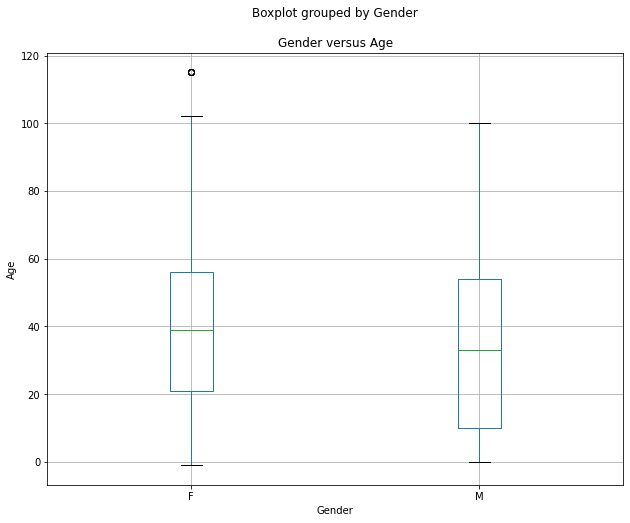

In [40]:
fig, ax = plt.subplots(figsize=(10,8))
plt.suptitle('')
df_app.boxplot(column=['Age'], by='Gender', ax=ax)
plt.title("Gender versus Age")
plt.xlabel("Gender")
plt.ylabel("Age");
# Plots a boxplot of age by gender

In [41]:
df_app[["Gender", "Age"]].groupby("Gender").describe()
# Returns summary statistics of age based on gender

Age                                                    
          count       mean        std  min   25%   50%   75%    max
Gender                                                             
F       71840.0  38.893987  22.155235 -1.0  21.0  39.0  56.0  115.0
M       38687.0  33.736863  24.435221  0.0  10.0  33.0  54.0  100.0

We can see that the ranges for both males and females are quite similar, however the medican ages of 
females is higher than males (39 years versus 33 years). Also we can see that the -1 year is a female
and most likey represents a pregant person. Interestingly there are more females than males in 
in this surgury

### Research Question 2 do more men or women miss there appointments?

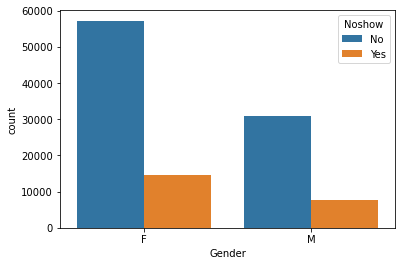

In [42]:
sns.countplot(x='Gender', hue='Noshow', data=df_app);
# Returns a plot of noshows based on gender

Since Yes means they did not show up, more women missed there appointments, however more women were attending this medical practice

### Research question 3 - what neighbourhood misses the most appointments?

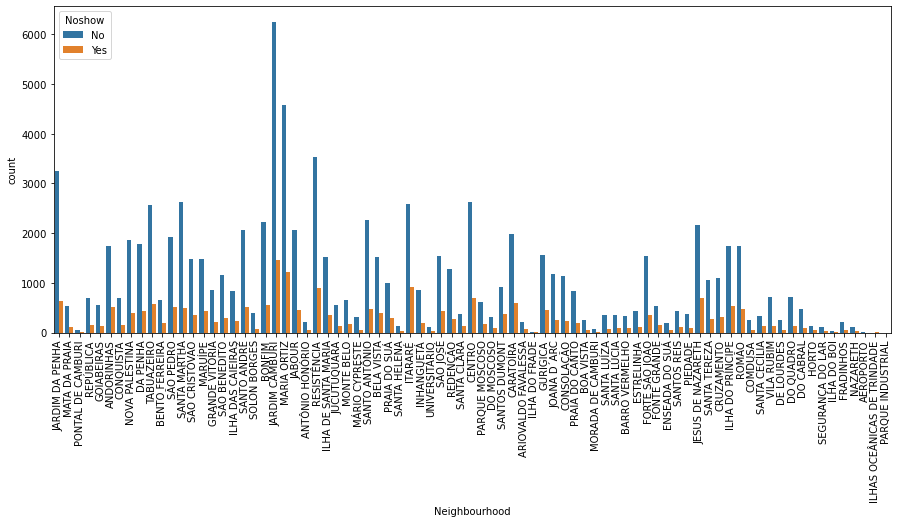

In [43]:
plt.figure(figsize=(15,6))
fig = sns.countplot(x='Neighbourhood',hue='Noshow',data=df_app)
fig.set_xticklabels(fig.get_xticklabels(), rotation=90);
# Shows a plot of all neighbourhoods so we can see who has he most noshows

The Neighbourhood of Jardim Camburi and Maria Ortiz had the most no-shows

###  Research question 4 - what variables might pridict the fate of noshows? 

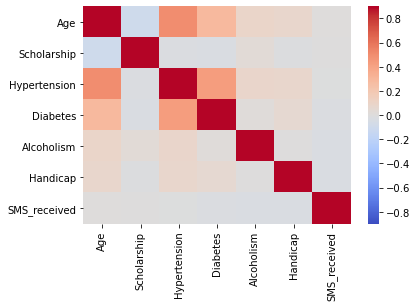

In [44]:
sns.heatmap(df_app.corr(), vmin=-0.9, vmax=0.9,cmap='coolwarm');
# Resurns a heatmap of parameters

 We can see that values like age and some of the diseases are related, which may mean further
exploration is needed later on. This can be used for basis of further anaysis by
Logistic regression or decision trees

### Research question 5 -  what proportion of total patients are noshows?

In [45]:
df_app['Noshow'] = pd.get_dummies(df_app['Noshow'])['Yes']
# Converting noshows as yes

In [46]:
no_show = len(df_app[df_app['Noshow'] == 1])
print(f'Noshows: {no_show}')
total = len(df_app)
print(f'Percentage no-show: {(no_show/total) * 100}')
# Showing portportion of noshows

Noshows: 22319
Percentage no-show: 20.193255946510806


We can see that 20.1% (or 22319) patients did not show up to their appointment 
the first expression was used to first convert non-numeric variables of the 'No-show' column 
(Yes/No) to logical variables, before getting the proportion


### Research Question 6 - is any day in particular quite busy

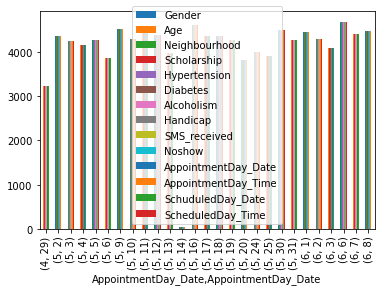

In [47]:
df_app["AppointmentDay_Date"] = df_app["AppointmentDay_Date"].astype("datetime64")
df_app.groupby([df_app["AppointmentDay_Date"].dt.month, df_app["AppointmentDay_Date"].dt.day]).count().plot(kind="bar");
# Producing a barchart of date date, namely of appointment days to see which day is busy

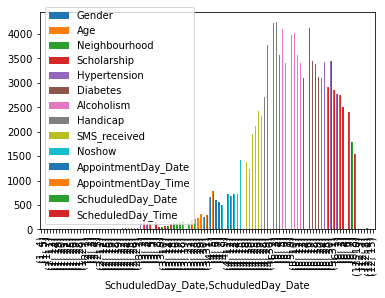

In [48]:
df_app["SchuduledDay_Date"] = df_app["SchuduledDay_Date"].astype("datetime64")
df_app.groupby([df_app["SchuduledDay_Date"].dt.month, df_app["SchuduledDay_Date"].dt.day]).count().plot(kind="bar");
# Producing a barchart of date date, namely of schedueld days to see which day is busy


We can see that most appointment days have a similar amount of appointments (around 4000), however more appointments we scheduled towards 
the latter half of the dataset 

<a id='conclusions'></a>
## Conclusions

### Limitations
The data gave a good overview of how patients missed appointments. However some limiations occured in this anaysis. For example it would be good to have an additonal column to see how long each patient had their disease. This would further help in trying to access if having a disease affects a patients willingness to go to an appointment or if patients with a disease are better at looking after their health. In this instance, missing data did not play a problem in the assessment. In addition, an economics column would have helped in generated more insights, especially as we have neighbourhood data. If we had coordinate data for these neighbour hood, we could look at this data in a spatial format and see does location play a factor in missing medical appointments. More women seem to miss their appointments when compared to men. This could imply men are better at looking after their health, but with the data provided we are unable to accept this hypothsis. Do women miss their appointments more as they are usually looking afte their children. If we had another column with number of childer we might be able to eplore this trend more. One question I would like to answer (but we dont have the data), is that do some doctors miss more patients than the mean. This could help expalin variation. Lastly, another column that would have potentialy explain (and present) why patients miss their appointments is if they are currently working. This could help explain why people are missing appointments.

### Conclusions
Overall, we can see that more women are scheducing medical appointments. However, a big proportion of patients do not attend their appointments (about 20%). Whhile appointments were scheduled in advance, the same number of appointments took place every day (about 4000) with 2 main neighbourhoods having the most appointments. Using this Notebook as an exploratory analysis further analysis using decision trees or logistic regression is possible 